In [1]:
import os
import pandas as pd
import scanpy as sc
#import scrublet as scr
import anndata as ad
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor="white")
sc.set_figure_params(fontsize=12,frameon=False)
sc.settings.vector_friendly = False


scanpy==1.10.3 anndata==0.10.9 umap==0.5.7 numpy==2.0.2 scipy==1.13.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


## All Conditions

In [3]:
#Load data. Object made in the Control-analysis.ipynb notebook
adata_combined=sc.read_h5ad('Final_Notebooks/Final_Objects/PBMC_Unprocessed.h5ad')

In [4]:
adata = adata_combined.copy()
adata

AnnData object with n_obs × n_vars = 129566 × 16537
    obs: 'ExperimentID', 'ConditionID', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'Donor', 'Condition', 'sample'

### QC Visualization

In [5]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


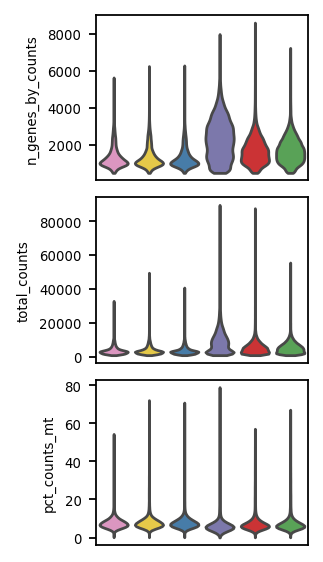

In [6]:
# Set default figure size for all plots
plt.rcParams['figure.figsize'] = [3.5, 3.5]  # Can adjust this globally if needed

# Set Scanpy figure parameters
sc.set_figure_params(fontsize=6, frameon=False)

# Define a custom color palette matching experimental conditions
palette_cust = ['#e78ac3', '#ffd92f', '#377eb8', '#7570b3', '#e41a1c', '#4daf4a']

# QC metrics to visualize
variables = ["n_genes_by_counts", "total_counts", "pct_counts_mt"]

# Create vertical subplots (one for each QC variable)
fig, axes = plt.subplots(
    nrows=len(variables),
    ncols=1,
    figsize=(2, len(variables) + 0.5)  # Keep it compact but tall enough
)

# Plot each QC metric as a violin plot grouped by 'Condition'
for var, ax in zip(variables, axes):
    sc.pl.violin(
        adata,
        keys=var,
        groupby='Condition',
        jitter=0.4,
        stripplot=False,
        rotation=45,
        palette=palette_cust,
        ax=ax,
        show=False
    )

    # Tidy up x-axis and grid
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.grid(False)

    # Add subtle axis ticks for y-axis only
    ax.tick_params(axis='x', which='both', bottom=True, top=False, length=3, color='black')
    ax.tick_params(axis='y', which='both', left=True, right=False, length=3, color='black')

# Final layout adjustments
plt.tight_layout()

# Save figure as a high-res PDF
plt.savefig('Final_Notebooks/Figures/QC/QC_Violin.pdf', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.violinplot(
/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: UserWarning: The palette list has more values (10) than needed (4), which 

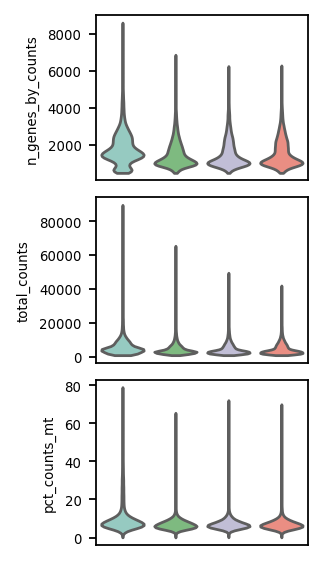

In [7]:
# Define a custom color palette for Donors
palette_cust = ['#8dd3c7', '#74c476', '#bebada', '#fb8072', '#80b1d3',
                '#fdb462', '#b3de69', '#fccde5', '#ae017e', '#bc80bd']

# QC metrics to plot
variables = ["n_genes_by_counts", "total_counts", "pct_counts_mt"]

# Create vertically stacked subplots (one for each QC variable)
fig, axes = plt.subplots(
    nrows=len(variables),
    ncols=1,
    figsize=(2, len(variables) + 0.5)  # Adjusted height for clean spacing
)

# Generate violin plots for each QC variable, grouped by Donor
for var, ax in zip(variables, axes):
    sc.pl.violin(
        adata,
        keys=var,
        groupby='Donor',           # Group by donor
        jitter=0.4,                # Add jitter for distribution width
        stripplot=False,           # Hide individual data points
        rotation=45,               # Optional: for x-label rotation
        palette=palette_cust,      # Custom color palette
        ax=ax,
        show=False
    )

    # Clean up axis formatting
    ax.set_xticklabels([])        # Hide x-axis labels
    ax.set_xticks([])             # Hide x-axis ticks
    ax.grid(False)                # Remove grid for clean background

    # Tidy up y-axis ticks
    ax.tick_params(axis='x', which='both', bottom=True, top=False, length=3, color='black')
    ax.tick_params(axis='y', which='both', left=True, right=False, length=3, color='black')

# Adjust layout and save to file
plt.tight_layout()
plt.savefig('Final_Notebooks/Figures/QC/QC_Violin_Donor.pdf', bbox_inches='tight', dpi=300)

# Show the plots
plt.show()


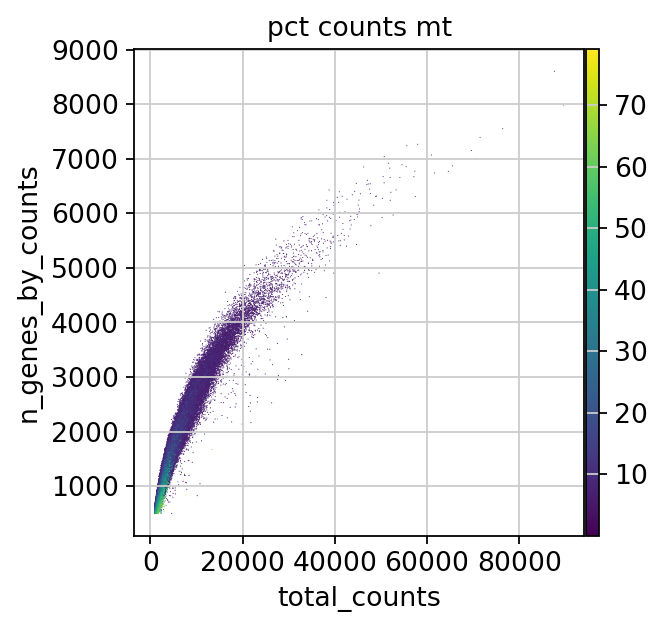

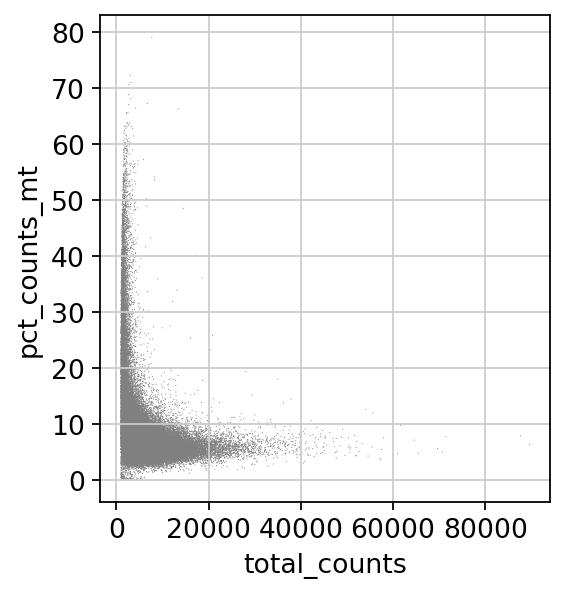

In [8]:
sc.set_figure_params(fontsize=12,frameon=False)

sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")

In [9]:
adata.obs['predicted_doublet'].value_counts()

predicted_doublet
False    128515
True       1051
Name: count, dtype: int64

In [10]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [11]:
# Normalizing to median total counts
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:01)


### Filter Doublets

In [12]:

adata.obs['predicted_doublet_0.2'] = adata.obs['doublet_score'] > 0.20
adata.obs['predicted_doublet_0.25'] = adata.obs['doublet_score'] > 0.25

In [13]:
adata.obs['predicted_doublet_0.2'].value_counts()

predicted_doublet_0.2
False    125885
True       3681
Name: count, dtype: int64

In [14]:
adata.obs['predicted_doublet_0.25'].value_counts()

predicted_doublet_0.25
False    127230
True       2336
Name: count, dtype: int64

/tmp/ipykernel_3754461/3436856488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_doublet_0.2', y='doublet_score', data=adata.obs, palette="Set2")


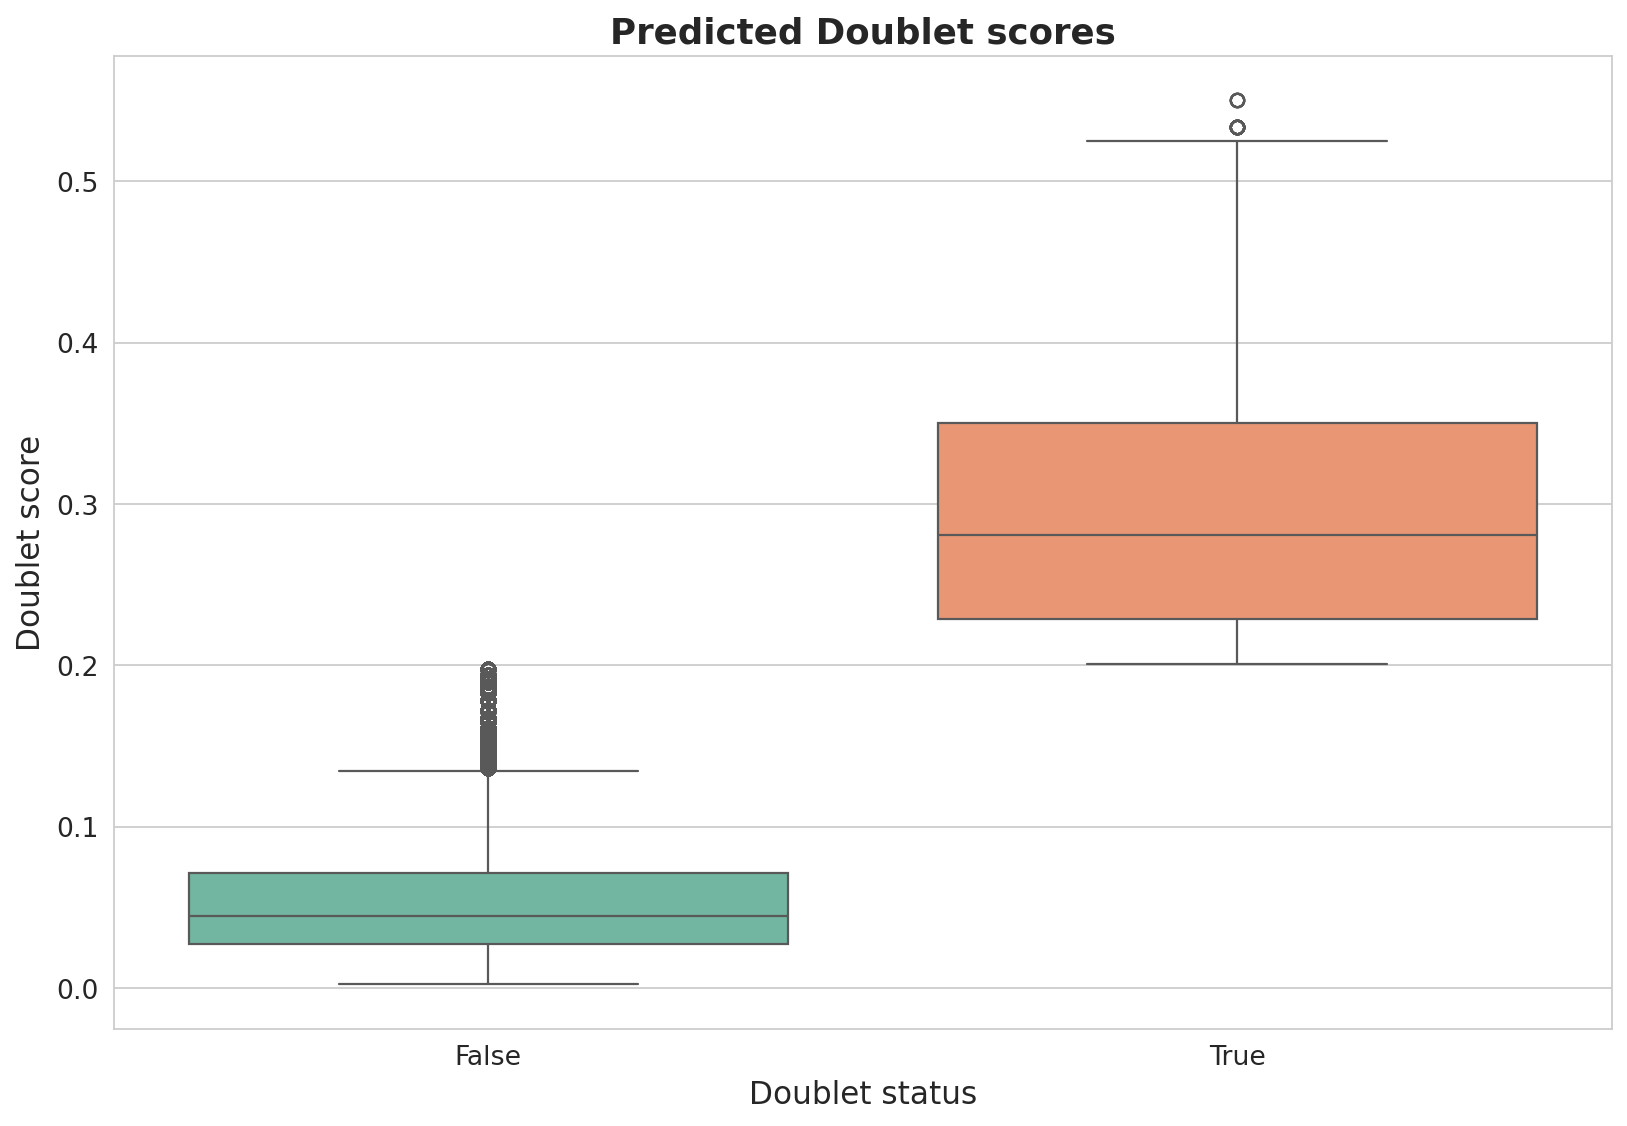

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))  # Larger figure size
sns.boxplot(x='predicted_doublet_0.2', y='doublet_score', data=adata.obs, palette="Set2")

# Adding labels and title
plt.title('Predicted Doublet scores', fontsize=16, fontweight='bold')
plt.xlabel('Doublet status', fontsize=14)
plt.ylabel('Doublet score', fontsize=14)

# Show the plot
plt.show()

In [16]:
#save preprocessed object
adata.write_h5ad('Final_Notebooks/Final_Objects/PBMC_preprocessed.h5ad')

In [17]:
adata_filtered = adata[adata.obs['predicted_doublet_0.2']==False]
adata_filtered = adata_filtered[adata_filtered.obs['pct_counts_mt'] < 20.0]

In [18]:
#Save fully filtered object
adata_filtered.write_h5ad('Final_Notebooks/Final_Objects/PBMC_preprocessed_filtered.h5ad')

## Cluster Data

extracting highly variable genes
    finished (0:00:06)


/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:696: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/as3562/miniconda3/envs/PBMC_env/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:24)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:35)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:45)
running Leiden clustering


/tmp/ipykernel_3754461/3955789974.py:26: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(


    finished: found 9 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:14)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:20)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:18)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:23)


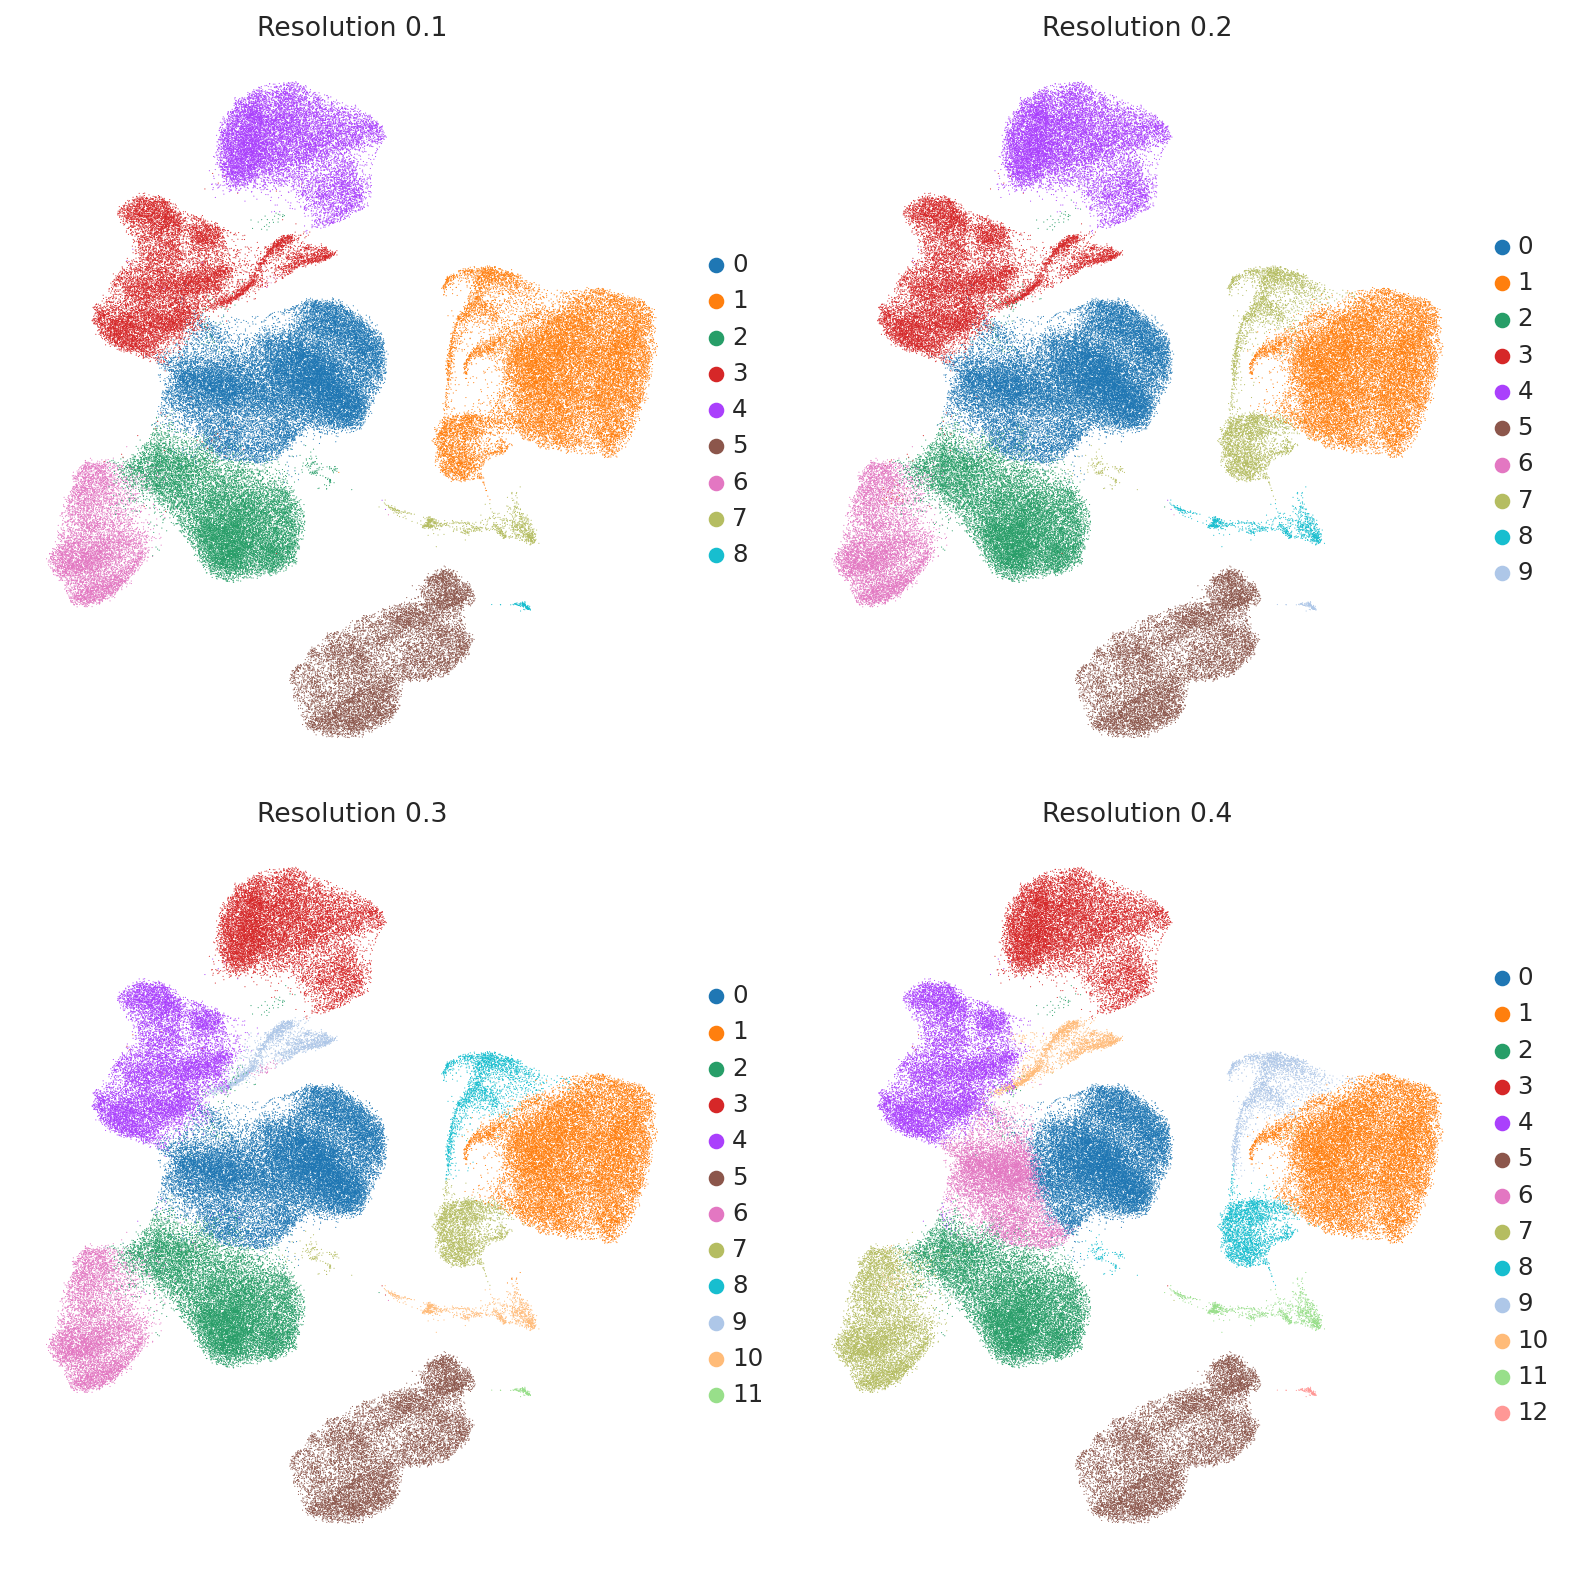

In [19]:
adata_new = adata_filtered

adata_new.uns["log1p"]["base"] = None

sc.pp.highly_variable_genes(adata_new, batch_key= "sample")

adata_new.raw = adata_new
adata_new = adata_new[:, adata_new.var.highly_variable]

sc.pp.scale(adata_new, max_value=10)

sc.tl.pca(adata_new, svd_solver="arpack")

sc.pp.neighbors(adata_new, n_pcs=20)

sc.tl.umap(adata_new)

resolutions = np.arange(0.1, 0.5, 0.1)  # This creates an array from 0.1 to 1.0, inclusive, stepping by 0.1

# Loop through each resolution
for resolution in resolutions:
    # Format the key to include the current resolution value
    key_added = f'leiden_{resolution:.1f}'  # Ensures one decimal place in the string
    
    # Run leiden clustering with the current resolution
    sc.tl.leiden(
        adata_new,
        resolution=resolution,
        random_state=0,
        key_added=key_added
    )

resolutions = np.arange(0.1, 0.5, 0.1)

# Setup the subplot dimensions
n_rows = 2  
n_cols = 2  
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Loop through each resolution to plot UMAP for each Leiden clustering
for i, resolution in enumerate(resolutions):
    key_added = f'leiden_{resolution:.1f}'
    
    # Plotting UMAP on a specific subplot
    sc.pl.umap(
        adata_new,
        color=[key_added],
        title=f'Resolution {resolution:.1f}',
        ax=axs[i],  # Assign this plot to its subplot
        show=False  # Prevent showing the plot to handle it manually
    )

# Adjust layout
plt.tight_layout()

# Display all plots together
plt.show()

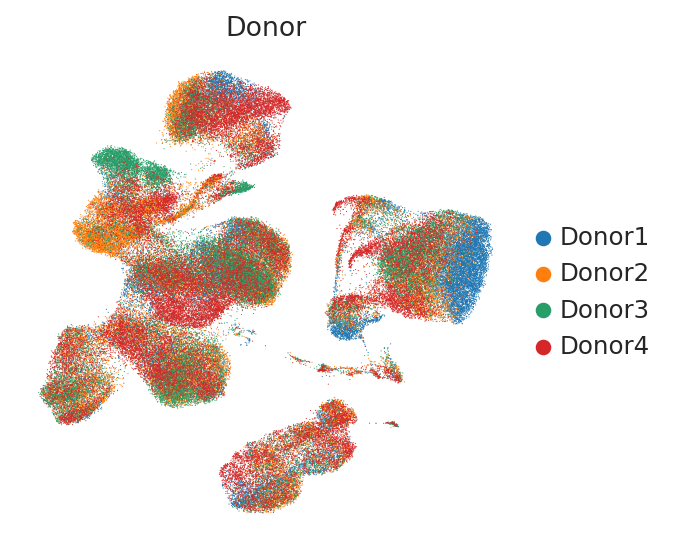

In [20]:
sc.pl.umap(adata_new, color=["Donor"])

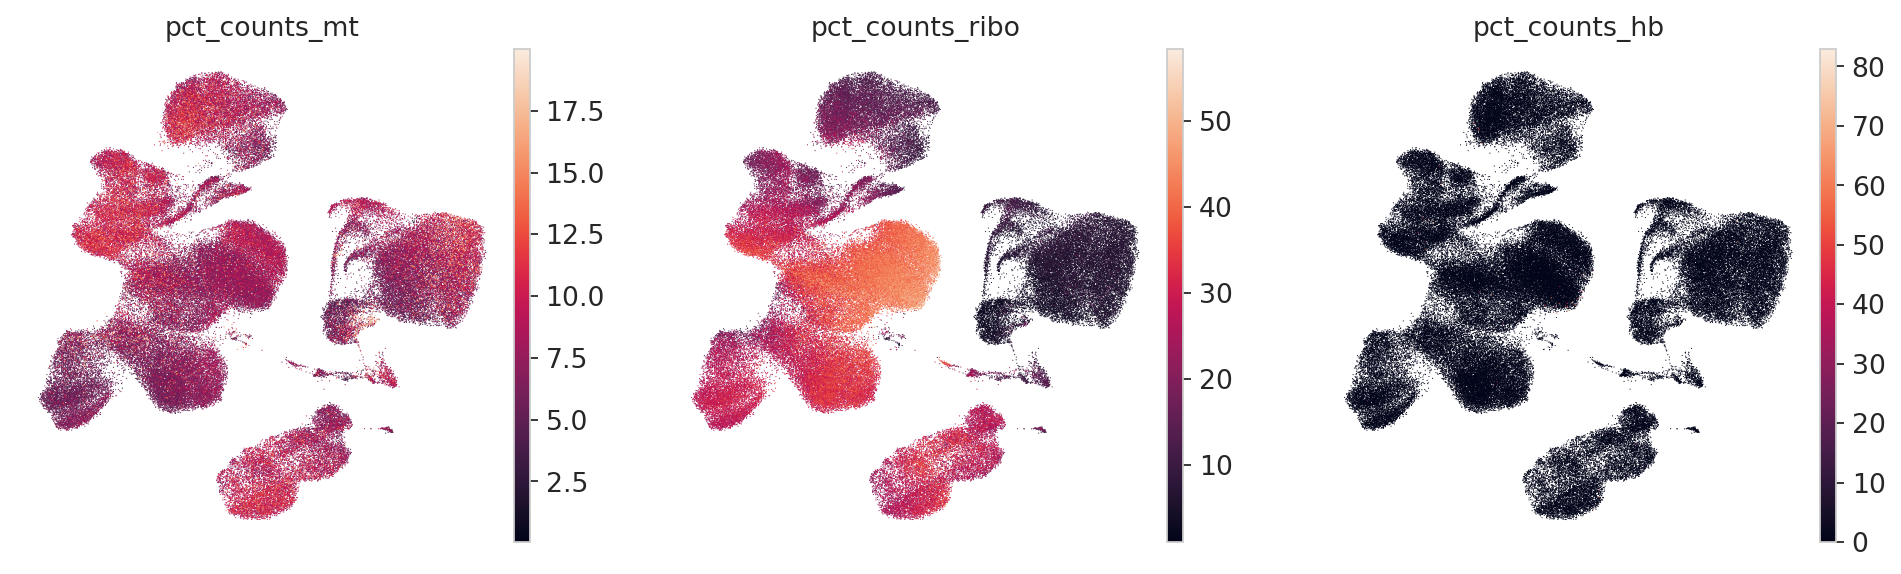

In [21]:

sc.pl.umap(adata_new, color=["pct_counts_mt","pct_counts_ribo","pct_counts_hb"])

In [22]:
#save clustered object
adata_new.write('Final_Notebooks/Final_Objects/PBMC_Clustered.h5ad')

ranking genes
    finished: added to `.uns['groups_genes_leiden_3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:01)


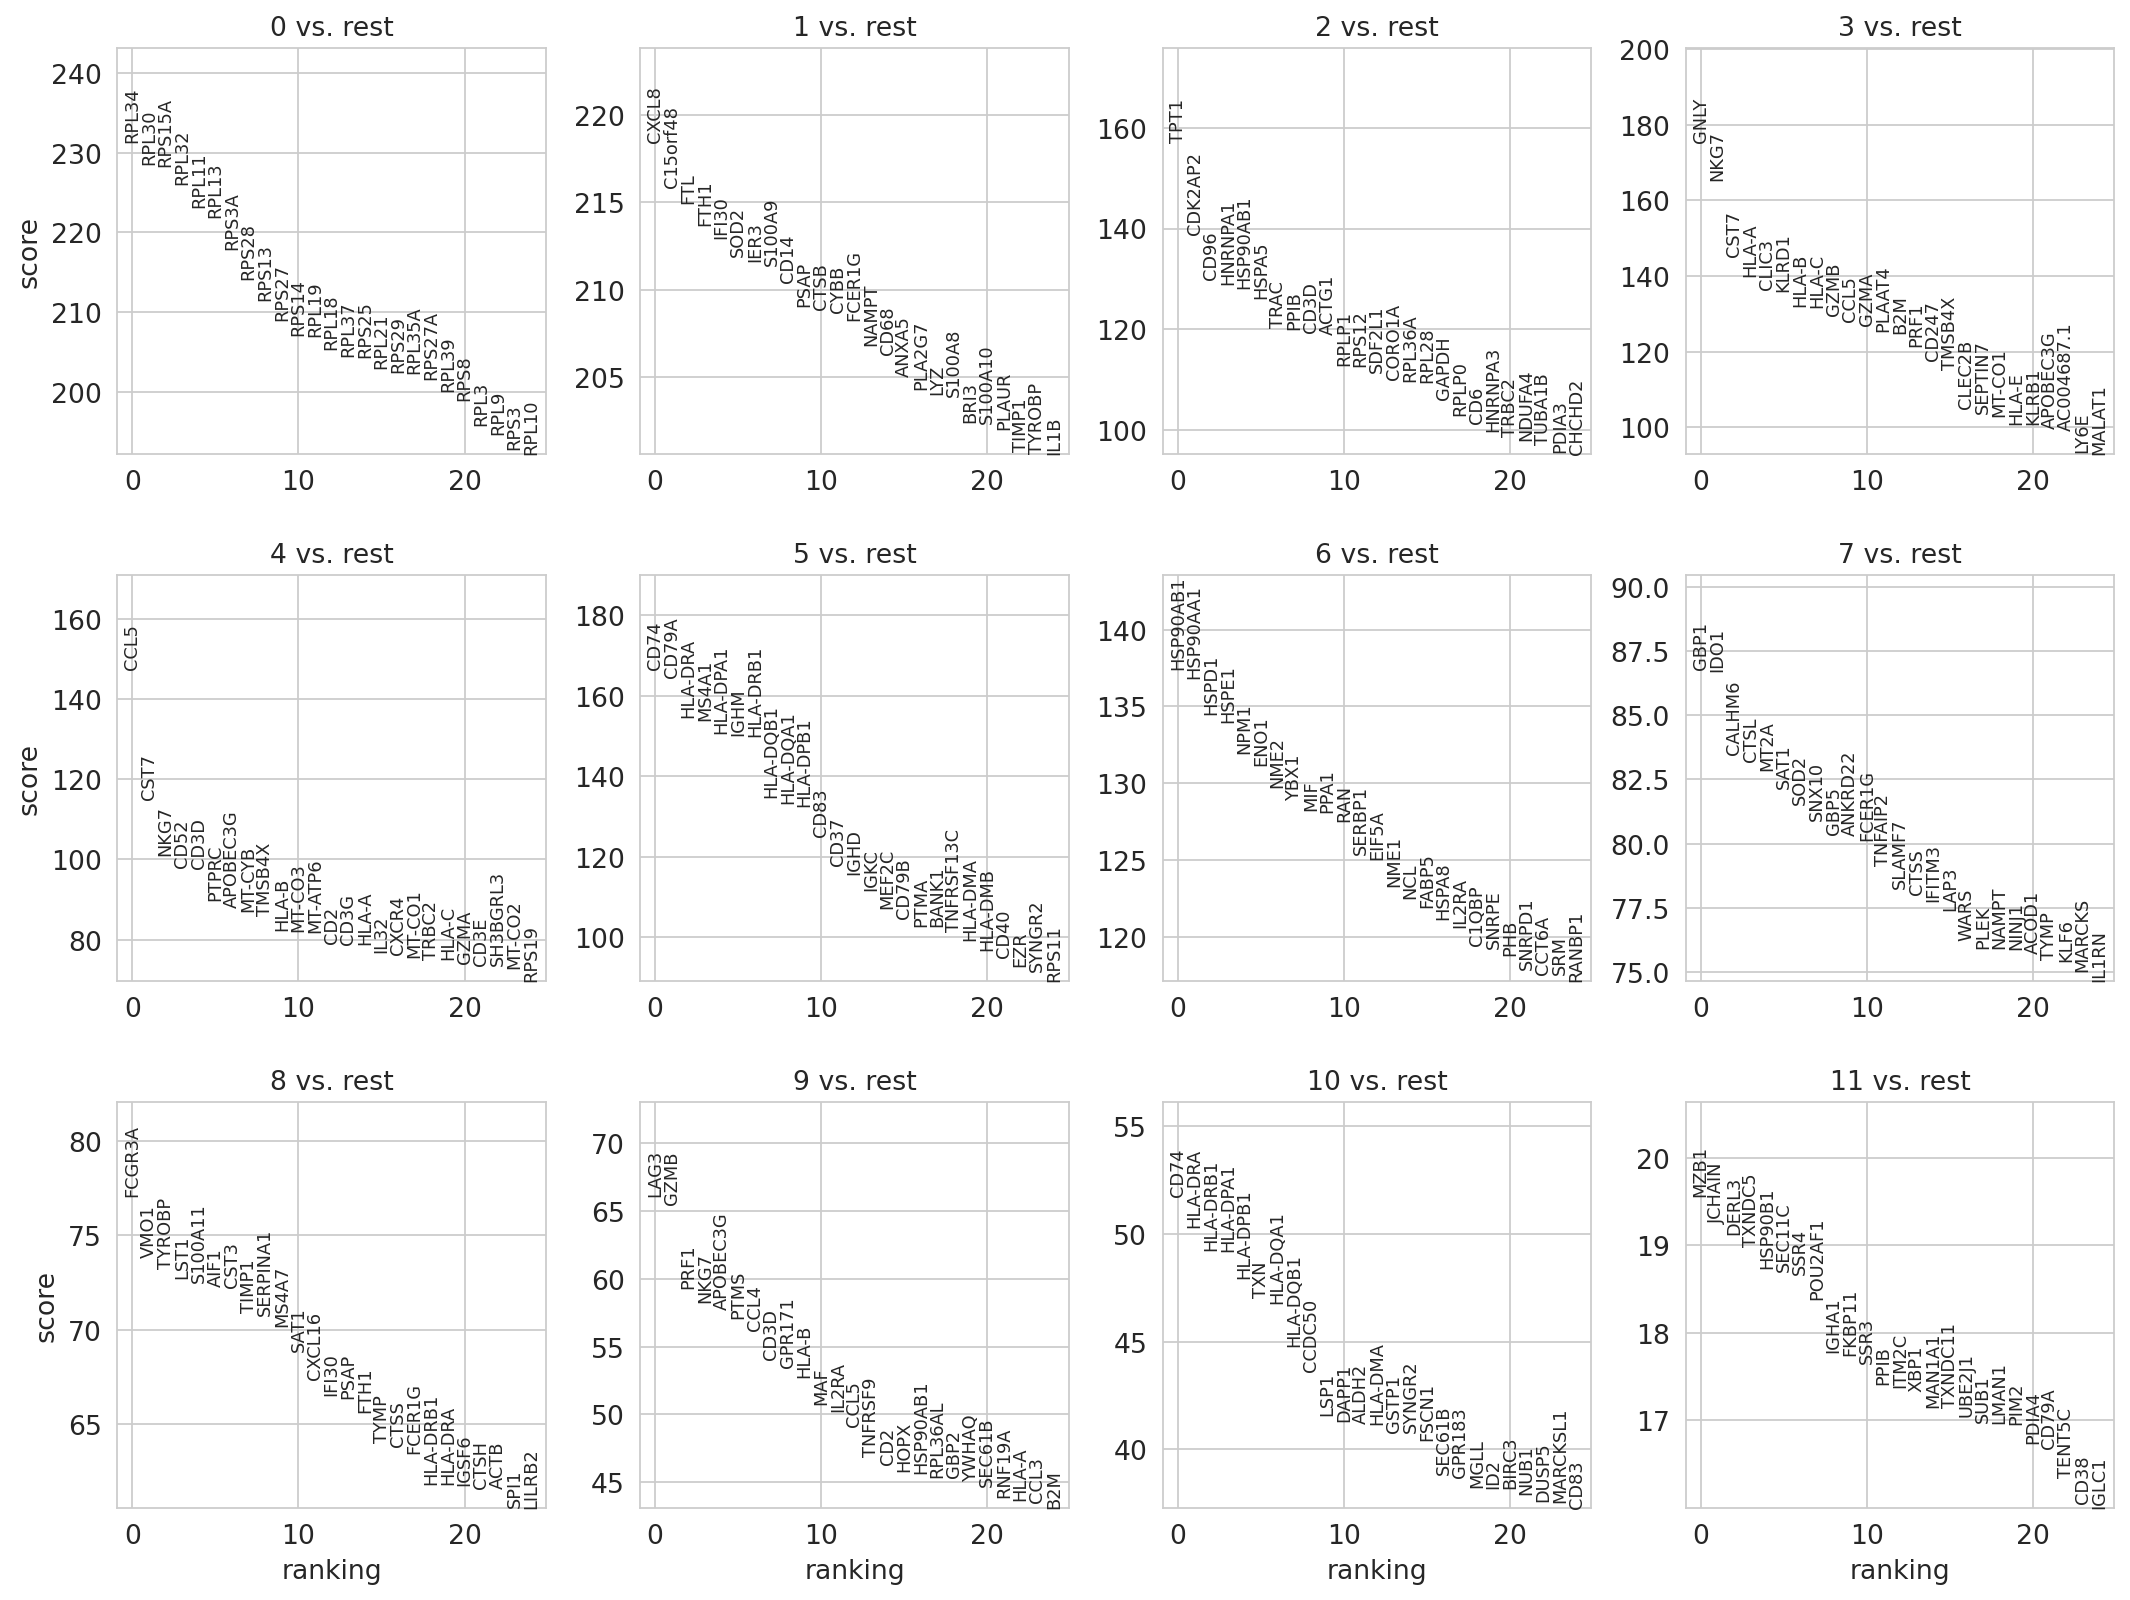

In [23]:
# Find DEGs
sc.tl.rank_genes_groups(adata_new, "leiden_0.3", method="wilcoxon",key_added='groups_genes_leiden_3')
sc.pl.rank_genes_groups(adata_new, n_genes=25, sharey=False,key='groups_genes_leiden_3')

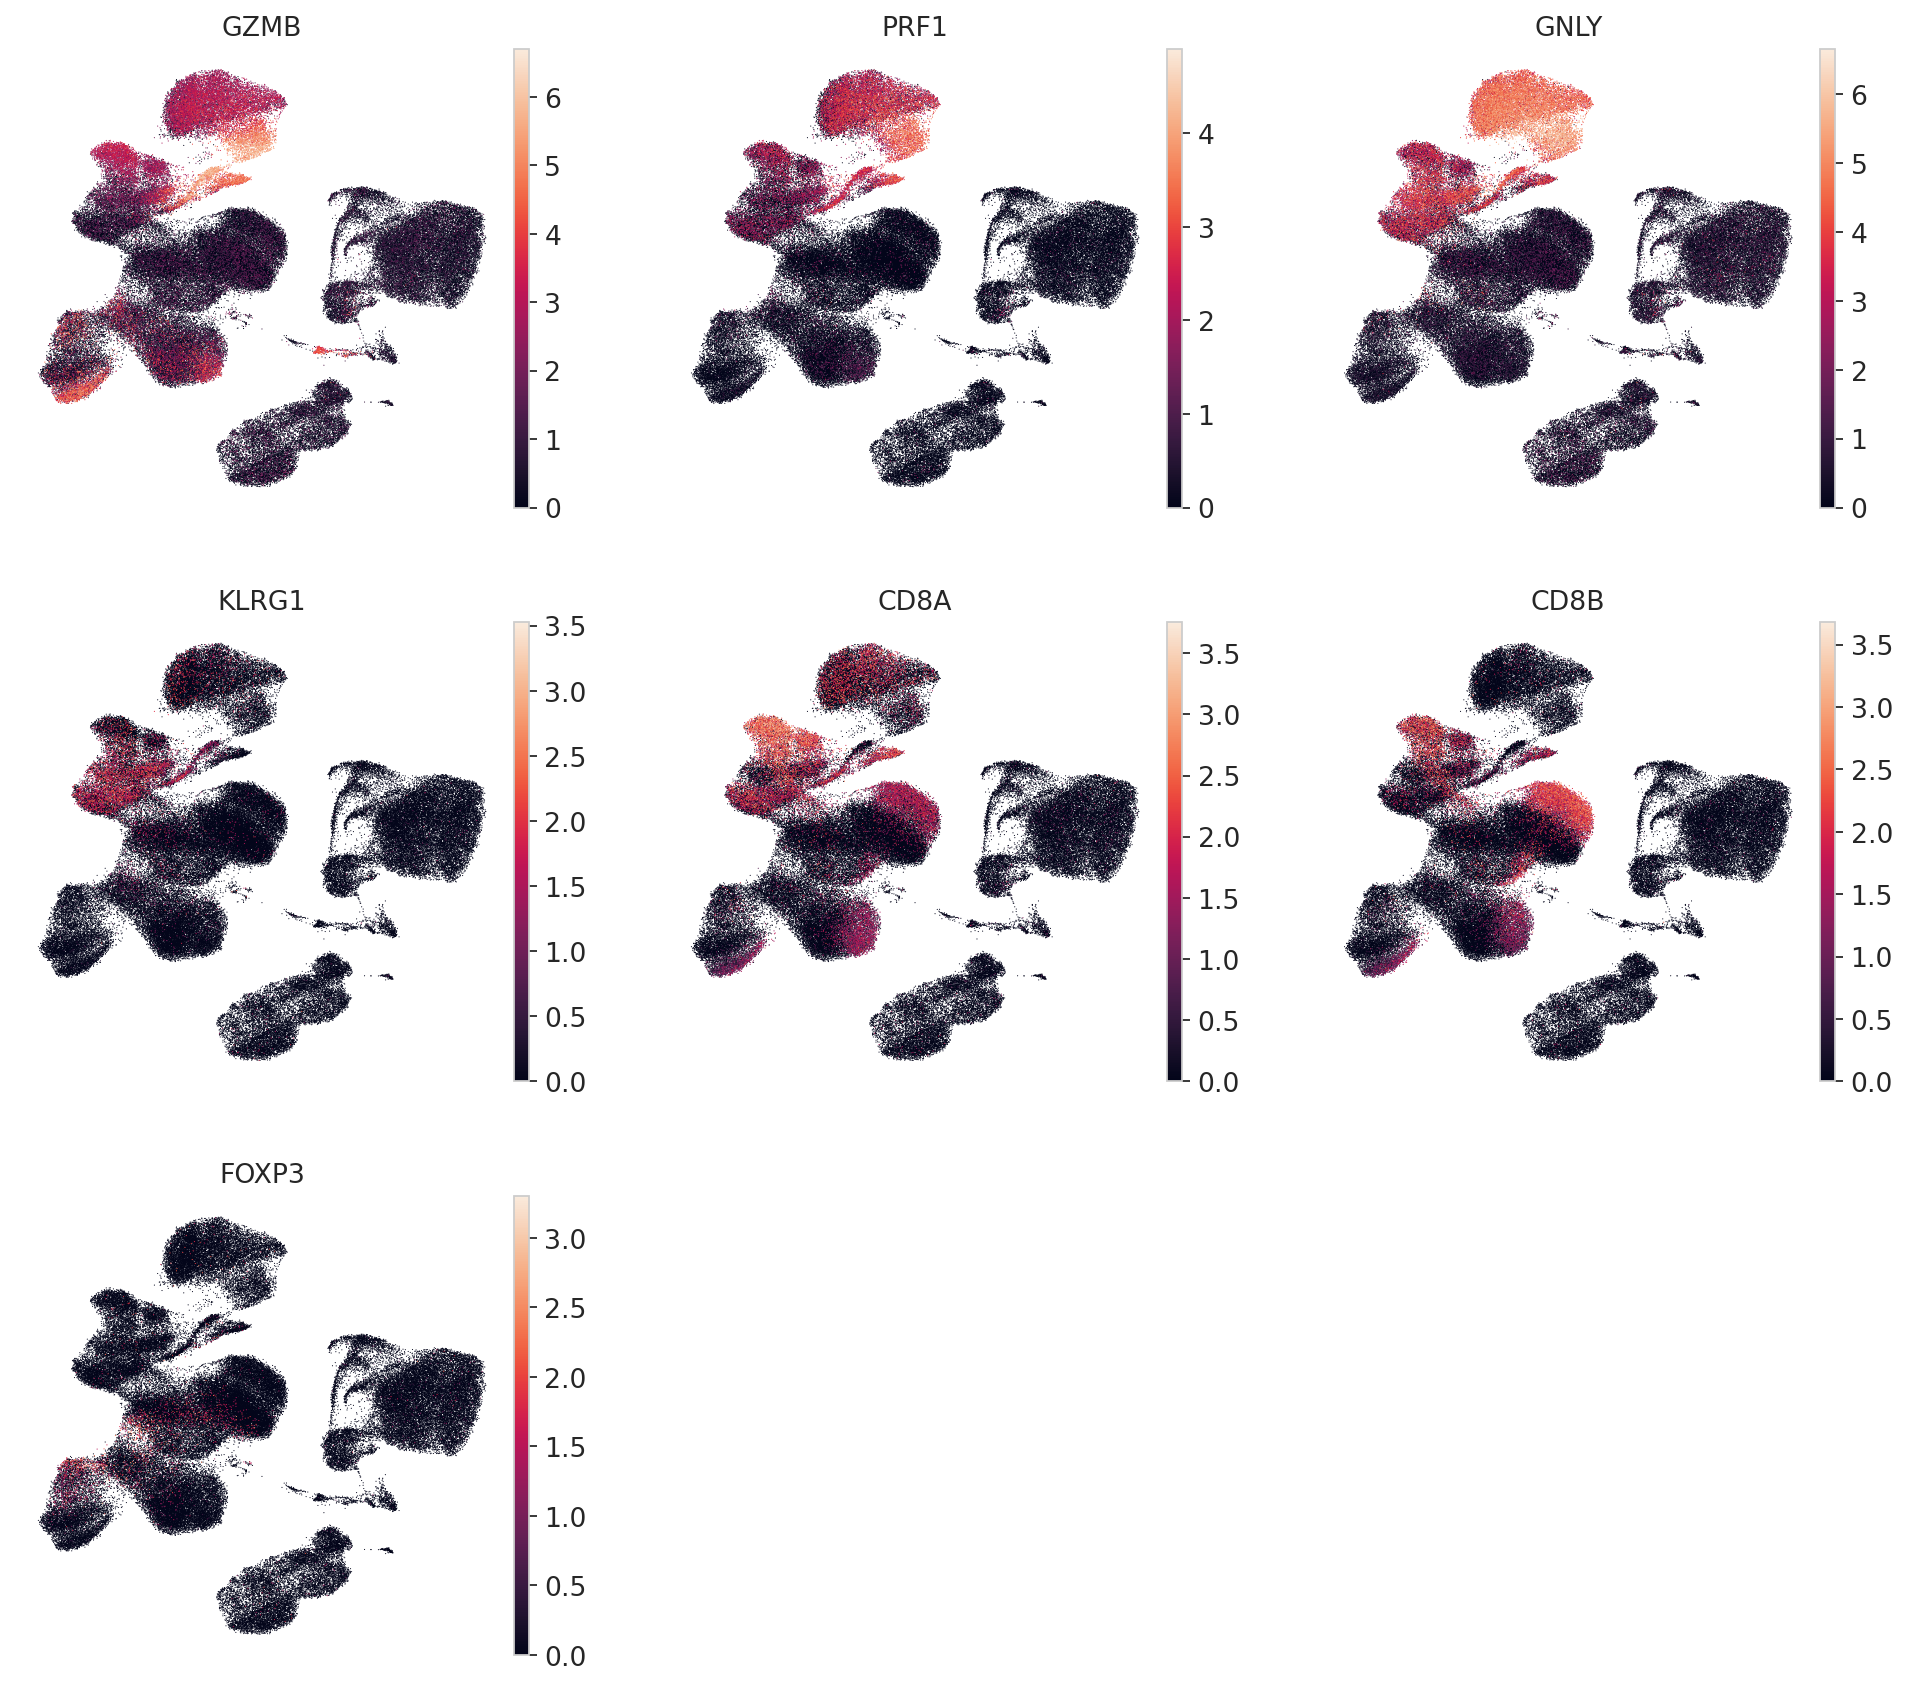

In [24]:
sc.pl.umap(adata_new, color=['GZMB', 'PRF1', 'GNLY','KLRG1','CD8A','CD8B','FOXP3'],ncols=3)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.3']`
categories: 0, 1, 2, etc.
var_group_labels: CD14 Monocytes, FCGR3A Monocytes, DCs, etc.


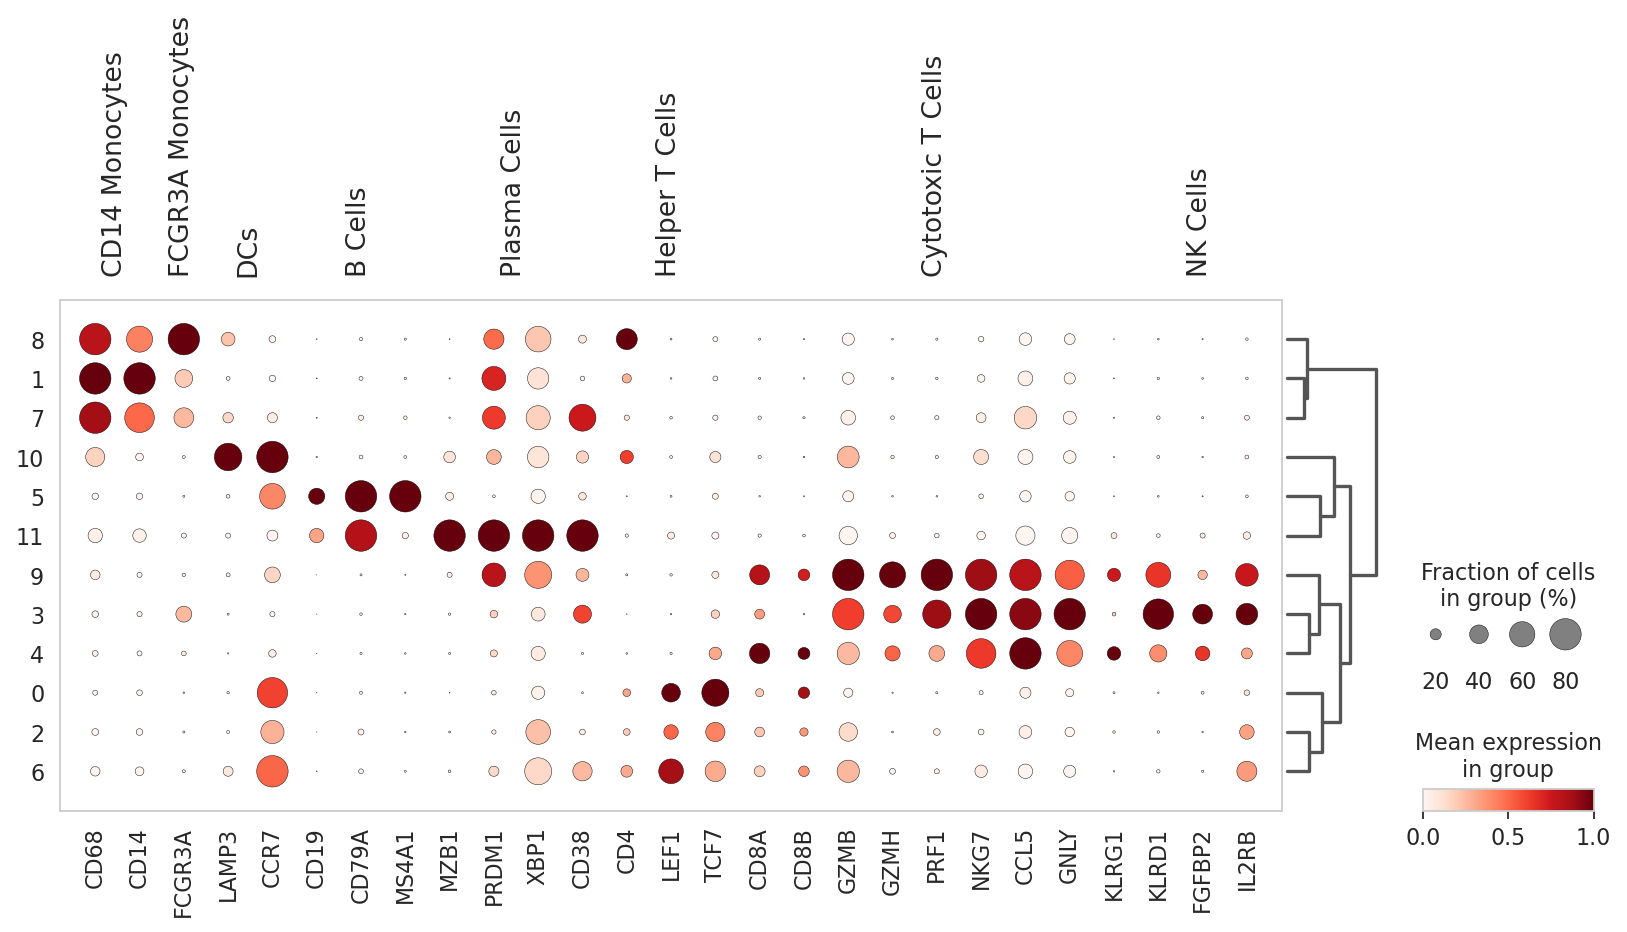

In [25]:
# Define a dictionary mapping immune cell types to their canonical marker genes
celltype_dict = {
    'CD14 Monocytes': ['CD68', 'CD14'],
    'FCGR3A Monocytes': ['FCGR3A'],
    'DCs': ['LAMP3', 'CCR7'],
    'B Cells': ['CD19', 'CD79A', 'MS4A1'],
    'Plasma Cells': ['MZB1', 'PRDM1', 'XBP1', 'CD38'],
    'Helper T Cells': ['CD4', 'LEF1', 'TCF7'],
    'Cytotoxic T Cells': ['CD8A', 'CD8B', 'GZMB', 'GZMH', 'PRF1', 'NKG7', 'CCL5', 'GNLY', 'KLRG1'],
    'NK Cells': ['KLRD1', 'FGFBP2', 'IL2RB']
}

# Generate a dot plot of expression of cell-type marker genes across Leiden clusters
sc.pl.dotplot(
    adata_new,
    var_names=celltype_dict,        # Gene sets grouped by cell type
    groupby="leiden_0.3",           # Cluster labels to group cells by
    dot_min=0,                      # Minimum dot size
    dot_max=0.8,                    # Maximum dot size
    dendrogram=True,                # Add dendrogram to reorder clusters based on similarity
    standard_scale='var'            # Scale each gene across clusters for comparability
)


In [26]:

manual_order = ['Control', 
                'BTP2', 
                'CM4620', 
                'PHA', 
                'PHA + BTP2', 
                'PHA + CM4620']  

adata_new.obs['Condition'] = pd.Categorical(adata_new.obs['Condition'], categories=manual_order, ordered=True)


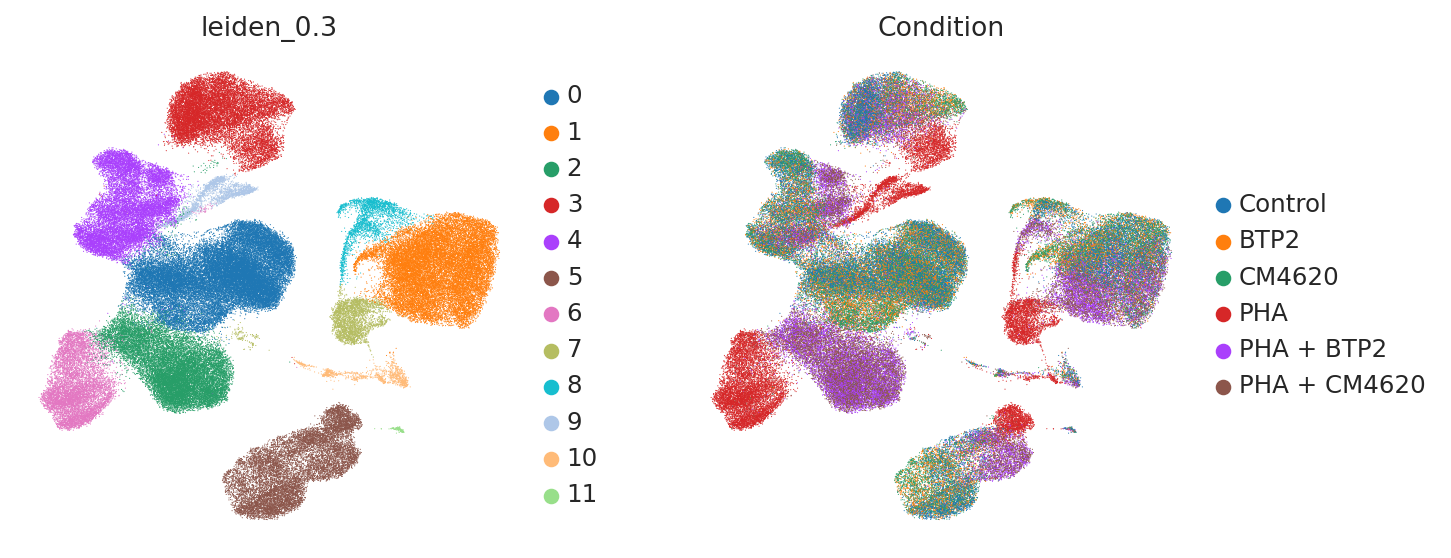

In [27]:
sc.pl.umap(adata_new, color=["leiden_0.3", "Condition"])

In [28]:
# Define a dictionary mapping Leiden cluster IDs to broad immune cell type annotations
broad_cluster_names = {
    "0":  "Helper T Cells",
    "1":  "CD14+ Classical Monocytes",
    "2":  "Helper T Cells",
    "3":  "NK cells",
    "4":  "Cytotoxic T Cells",
    "5":  "B Cells",
    "6":  "Helper T Cells",
    "7":  "CD14+ Classical Monocytes",
    "8":  "CD16+ non-Classical Monocytes",
    "9":  "Cytotoxic T Cells",
    "10": "Dendritic Cells",
    "11": "Plasma Cells"
}

# Map the annotations to a new column in the AnnData object
adata_new.obs['Annotations_broad'] = adata_new.obs['leiden_0.3'].map(broad_cluster_names)

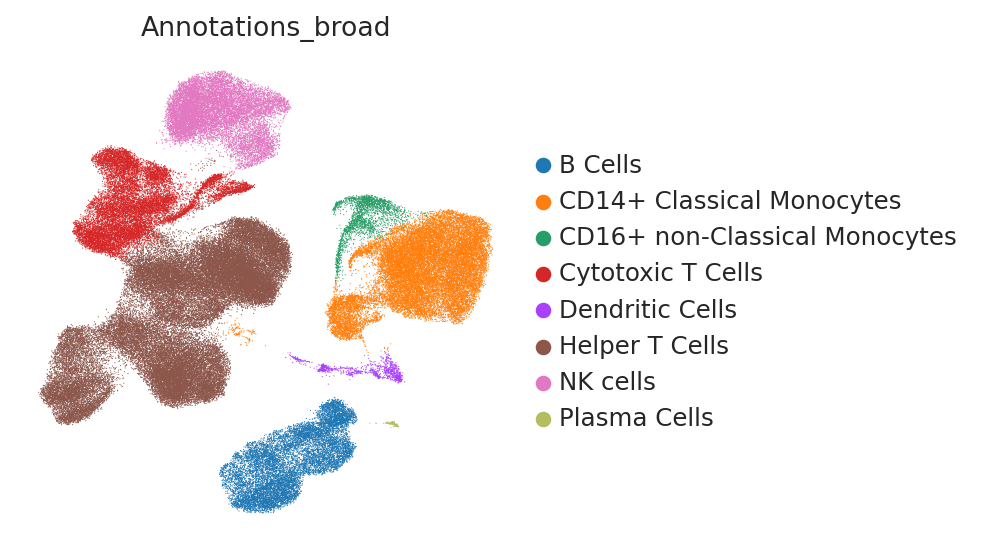

In [29]:
sc.pl.umap(adata_new, color=["Annotations_broad"],ncols=1)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Annotations_broad']`
categories: B Cells, CD14+ Classical Monocytes, CD16+ non-Classical Monocytes, etc.
var_group_labels: CD14 Monocytes, FCGR3A Monocytes, DCs, etc.


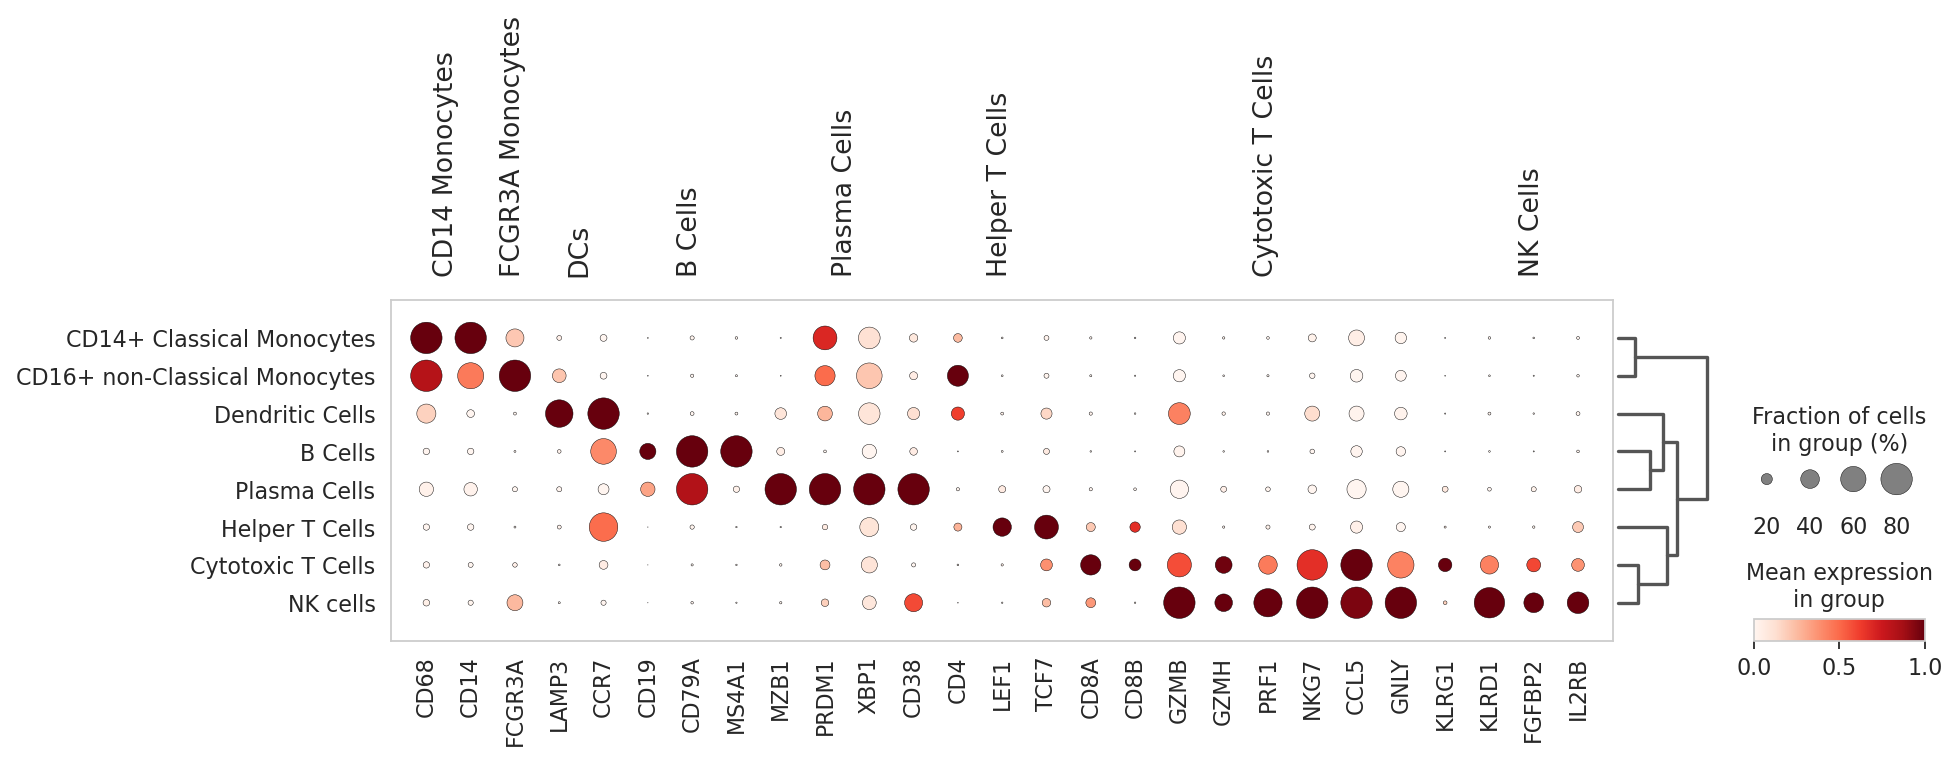

In [30]:
# Define a dictionary of cell types and their corresponding marker genes
celltype_dict = {
    'CD14 Monocytes': ['CD68', 'CD14'],
    'FCGR3A Monocytes': ['FCGR3A'],
    'DCs': ['LAMP3', 'CCR7'],
    'B Cells': ['CD19', 'CD79A', 'MS4A1'],
    'Plasma Cells': ['MZB1', 'PRDM1', 'XBP1', 'CD38'],
    'Helper T Cells': ['CD4', 'LEF1', 'TCF7'],
    'Cytotoxic T Cells': ['CD8A', 'CD8B', 'GZMB', 'GZMH', 'PRF1', 'NKG7', 'CCL5', 'GNLY', 'KLRG1'],
    'NK Cells': ['KLRD1', 'FGFBP2', 'IL2RB']
}

# Generate a dot plot to visualize expression of cell type marker genes across annotated cell types
sc.pl.dotplot(
    adata_new,
    var_names=celltype_dict,        # Cell type marker dictionary
    groupby="Annotations_broad",    # Grouping of cells to show on x-axis
    dot_min=0,                      # Minimum dot size (for low expression)
    dot_max=0.8,                    # Maximum dot size (prevents overscaling)
    dendrogram=True,                # Add clustering dendrogram based on expression similarity
    standard_scale='var'            # Scale gene expression across groups (not across genes)
)

In [31]:
#save annotated object
adata_new.write("Final_Notebooks/Final_Objects/PBMC_Clustered_Annotated.h5ad")

In [32]:
#load annotated object
adata_new = sc.read_h5ad("Final_Notebooks/Final_Objects/PBMC_Clustered_Annotated.h5ad")
adata_new

AnnData object with n_obs × n_vars = 120853 × 1631
    obs: 'ExperimentID', 'ConditionID', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'Donor', 'Condition', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'predicted_doublet_0.2', 'predicted_doublet_0.25', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'Annotations_broad'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    u

In [33]:
!pip list

Package                   Version
------------------------- --------------
adjustText                1.3.0
anndata                   0.10.9
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
array_api_compat          1.9.1
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
Brotli                    1.1.0
cached-property           1.5.2
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
entrypoints               0.4
et_xmlfile                2.0.0
exceptiongroup            1.2.2
executing    